<a href="https://colab.research.google.com/github/NinaMwangi/linear_regression_model/blob/main/Multivariate_linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MULTIVARIATE LINEAR REGRESSION MODEL**
I will be creating a function to make a prediction using a Linear regression model, that is a Python function. I will use Fast API to create an API endpoint and upload source code files to a free hosting platform.

**PACKAGES**

In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 57.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.impute import SimpleImputer
from joblib import dump
import copy

#Dataset
https://www.kaggle.com/nelgiriyewithana/datasets

## Description
This dataset presents a comprehensive compilation of the most streamed songs on Spotify in 2024. It provides extensive insights into each track's attributes, popularity, and presence on various music platforms, offering a valuable resource for music analysts, enthusiasts, and industry professionals. The dataset includes information such as track name, artist, release date, ISRC, streaming statistics, and presence on platforms like YouTube, TikTok, and more.

In [ ]:
df = pd.read_csv("Data/Most Streamed Spotify Songs 2024 clean - Most Streamed Spotify Songs 2024.csv", encoding ='latin-1')
df.head()

,Track,Artist,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Tommy Richman,"390,470,936","30,716","196,631,588","5,767,700","651,565,900","5,332,281,936","150,597,040","2,669,262",0
1,Not Like Us,Kendrick Lamar,"323,703,884","28,113","174,597,137","674,700","35,223,547","208,339,025","156,380,351","1,118,279",1
2,i like the way you kiss me,Artemas,"601,309,283","54,331","211,607,669","3,025,400","275,154,237","3,369,120,610","373,784,955","5,285,340",0
3,Flowers,Miley Cyrus,"2,031,280,633","269,802","136,569,078","7,189,811","1,078,757,968","14,603,725,994","3,351,188,582","11,822,942",0
4,Lovin On Me,Jack Harlow,"670,665,438","105,892","175,421,034","4,202,367","214,943,489","2,938,686,633","2,867,222,632","4,517,131",1


In [ ]:
df = df.drop(['Track','Artist'], axis = 1)

In [ ]:
print(df.columns)
print(df.dtypes)

Index(['Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
       'TikTok Posts', 'TikTok Likes', 'TikTok Views',
       'YouTube Playlist Reach', 'Shazam Counts', 'Explicit Track'],
      dtype='object')
Spotify Streams           object
Spotify Playlist Count    object
Spotify Playlist Reach    object
TikTok Posts              object
TikTok Likes              object
TikTok Views              object
YouTube Playlist Reach    object
Shazam Counts             object
Explicit Track             int64
dtype: object


In [ ]:
# Convert columns to numeric, removing commas
numeric_columns = ['Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
                   'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'Shazam Counts']

for col in numeric_columns:
    df[col] = df[col].str.replace(',', '').astype(float)  # Remove commas and convert to float

print(df.dtypes)  # Verify the changes

Spotify Streams           float64
Spotify Playlist Count    float64
Spotify Playlist Reach    float64
TikTok Posts              float64
TikTok Likes              float64
TikTok Views              float64
YouTube Playlist Reach    float64
Shazam Counts             float64
Explicit Track              int64
dtype: object


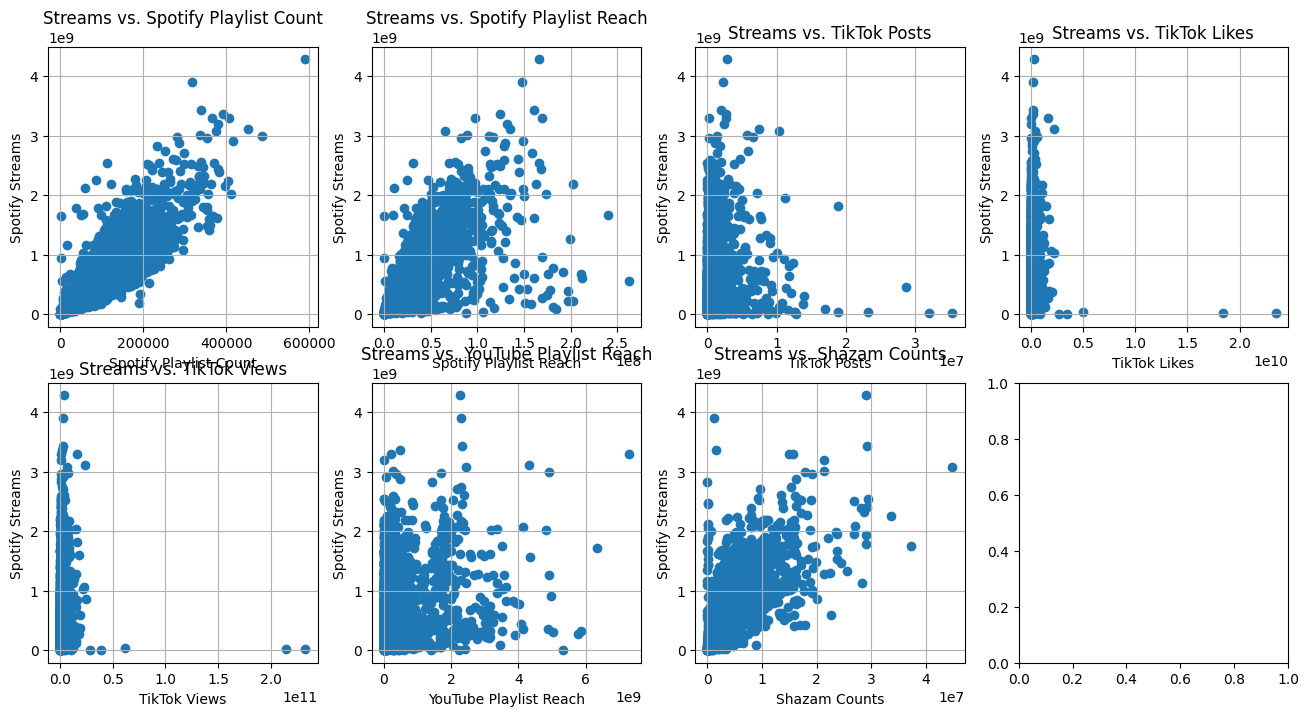

In [ ]:
# List of x-label features
x_features = ['Spotify Playlist Count', 'Spotify Playlist Reach', 'TikTok Posts',
               'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'Shazam Counts']

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot each feature against Spotify Streams
for i, feature in enumerate(x_features):
    axes[i].scatter(df[feature], df['Spotify Streams'])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Spotify Streams')
    axes[i].set_title(f'Streams vs. {feature}')
    axes[i].grid(True)


In [ ]:
new_column_names = {
    'Spotify Playlist Count': 'PlaylistCount',
    'Spotify Playlist Reach': 'PlaylistReach',
    'Shazam Counts': 'ShazamCounts',
    'Spotify Streams': 'Streams'  # Rename the target column as well
}

df = df.rename(columns=new_column_names)
df.head()

,Streams,PlaylistCount,PlaylistReach,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,ShazamCounts,Explicit Track
0,3.904709e+08,30716.0,196631588.0,5767700.0,6.515659e+08,5.332282e+09,1.505970e+08,2669262.0,0
1,3.237039e+08,28113.0,174597137.0,674700.0,3.522355e+07,2.083390e+08,1.563804e+08,1118279.0,1
2,6.013093e+08,54331.0,211607669.0,3025400.0,2.751542e+08,3.369121e+09,3.737850e+08,5285340.0,0
3,2.031281e+09,269802.0,136569078.0,7189811.0,1.078758e+09,1.460373e+10,3.351189e+09,11822942.0,0
4,6.706654e+08,105892.0,175421034.0,4202367.0,2.149435e+08,2.938687e+09,2.867223e+09,4517131.0,1


In [ ]:
from functools import lru_cache
# Select features and target variable
features = ['PlaylistCount', 'PlaylistReach', 'ShazamCounts']
target = 'Streams'

X = df[features]
y = df[target]

# Remove rows with missing values in y before imputation and train-test split
y_notna_index = y[y.notna()].index
X_notna = X.loc[y_notna_index]
y_notna = y[y_notna_index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_notna, y_notna, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)  # Keep index and columns
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)   # Keep index and columns

# Double-check for NaNs after imputation
print("Number of NaNs in X_train_imputed:", X_train_imputed.isna().sum().sum())

# train model
lr_model = LinearRegression()

# fit the model
lr_model.fit(X_train_imputed, y_train)


Number of NaNs in X_train_imputed: 0


LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = lr_model.predict(X_test_imputed)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Squared Error: 6.425257758521483e+16
Root Mean Squared Error: 253480921.5408821
R-squared: 0.8120942680744001


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Print the model's coefficients
print('Coefficients:', lr_model.coef_)
print('Intercept:', lr_model.intercept_)

Coefficients: [4.57517807e+03 3.47817984e+00 2.11700120e+01]
Intercept: 19341752.10790217


In [ ]:
dump(lr_model, 'API/spotify_streams_model.joblib')

['API/spotify_streams_model.joblib']